In [147]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error as mae 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 

import warnings 
warnings.filterwarnings('ignore')


#The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

total_bill: Total bill in dollars including taxes
tip: Tip given to waiters in dollars
sex: gender of the person paying the bill
smoker: whether the person smoked or not
day: day of the week
time: lunch or dinner
size: number of people in a table
So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips and train a machine learning model to predict the waiter’s tipping.

In [148]:
df = pd.read_csv('tips.csv') 
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
df.shape

(244, 7)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# EDA

In [123]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Data Visualization

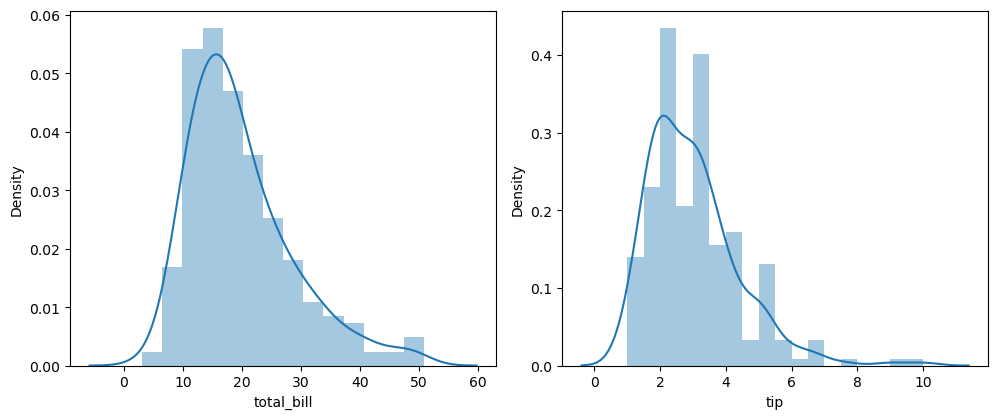

In [124]:
plt.subplots(figsize=(15,8)) 
  
for i, col in enumerate(['total_bill', 'tip']): 
    plt.subplot(2,3, i + 1) 
    sb.distplot(df[col]) 
plt.tight_layout() 
plt.show()

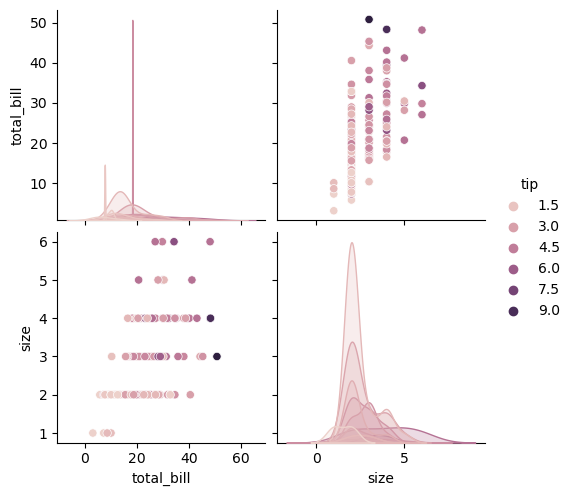

In [125]:
import seaborn as sns
sns.pairplot(data = df, hue = 'tip')

array([[<Axes: xlabel='total_bill', ylabel='total_bill'>,
        <Axes: xlabel='tip', ylabel='total_bill'>,
        <Axes: xlabel='size', ylabel='total_bill'>],
       [<Axes: xlabel='total_bill', ylabel='tip'>,
        <Axes: xlabel='tip', ylabel='tip'>,
        <Axes: xlabel='size', ylabel='tip'>],
       [<Axes: xlabel='total_bill', ylabel='size'>,
        <Axes: xlabel='tip', ylabel='size'>,
        <Axes: xlabel='size', ylabel='size'>]], dtype=object)

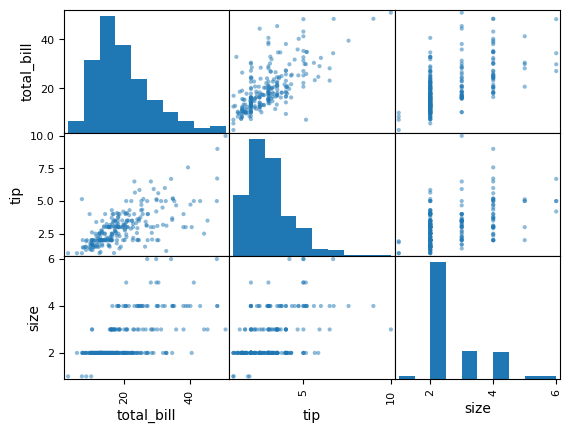

In [126]:
pd.plotting.scatter_matrix(df)

In [127]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [128]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [129]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [130]:
figure = px.pie(df, values='tip', names='day',hole = 0.5)
figure.show()

In [131]:
figure = px.pie(df, values='tip',names='sex',hole = 0.5)
figure.show()

In [132]:
figure = px.pie(df, values='tip',names='smoker',hole = 0.5)
figure.show()

In [133]:
figure = px.pie(df, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

<Axes: >

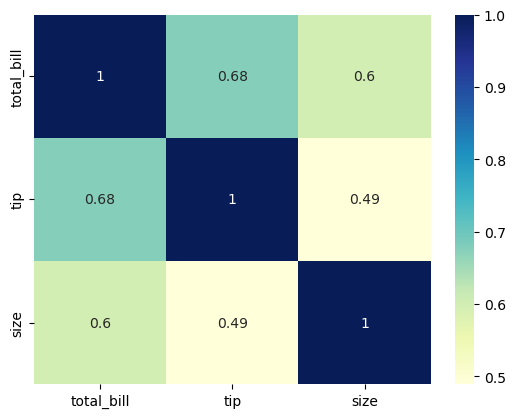

In [134]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

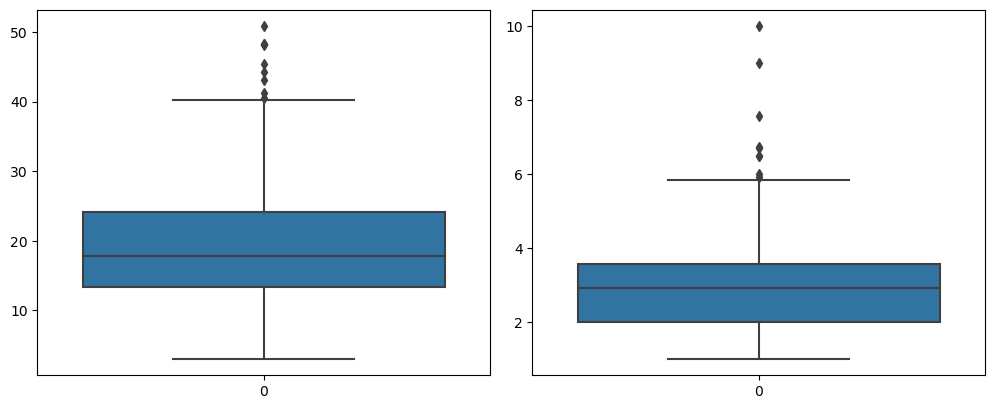

In [135]:
plt.subplots(figsize=(15,8)) 
  
for i, col in enumerate(['total_bill', 'tip']): 
  plt.subplot(2,3, i + 1) 
  sb.boxplot(df[col]) 
plt.tight_layout() 
plt.show()

In [136]:
df.shape, df[(df['total_bill']<45) & (df['tip']<7)].shape

((244, 7), (238, 7))

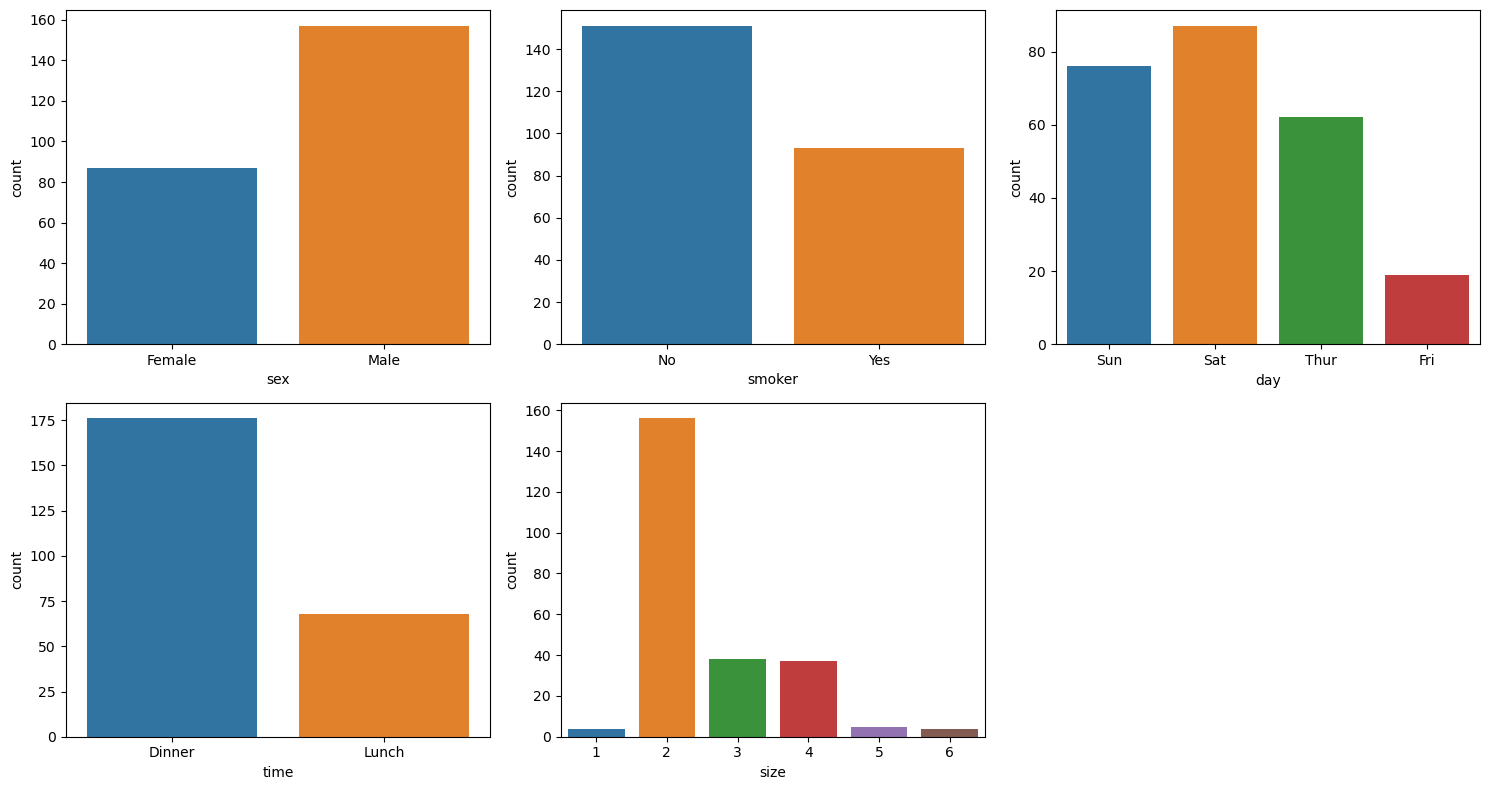

In [137]:
import seaborn as sb
import matplotlib.pyplot as plt

feat = df.loc[:, 'sex':'size'].columns

plt.subplots(figsize=(15, 8))

for i, col in enumerate(feat):
    plt.subplot(2, 3, i + 1)
    sb.countplot(data=df, x=col)
    
plt.tight_layout()
plt.show()


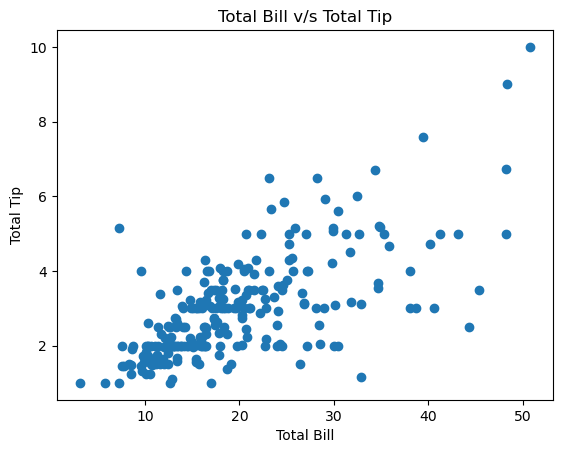

In [138]:
plt.scatter(df['total_bill'], df['tip']) 
plt.title('Total Bill v/s Total Tip') 
plt.xlabel('Total Bill') 
plt.ylabel('Total Tip') 
plt.show()

In [139]:
df.groupby(['size']).mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [140]:
df.groupby(['time']).mean()

,total_bill,tip,size
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


In [141]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [142]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000


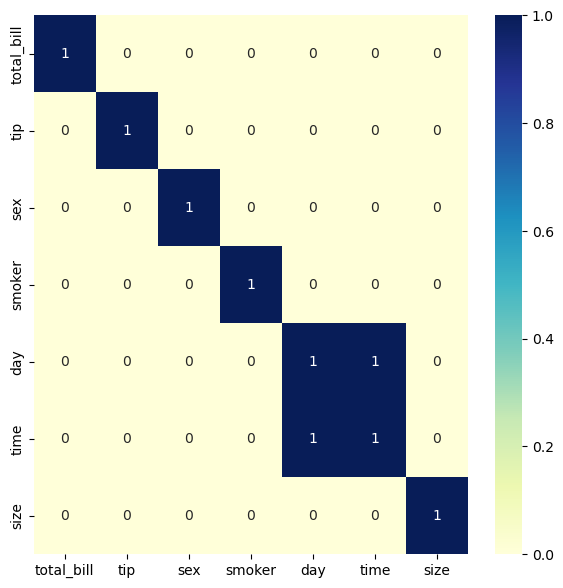

In [143]:
plt.figure(figsize=(7,7)) 
sb.heatmap(df.corr() > 0.7, annot = True, cmap='YlGnBu') 
plt.show()

In [144]:
features = df.drop('tip', axis=1) 
target = df['tip'] 
  
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22) 
X_train.shape, X_val.shape

((195, 6), (49, 6))

In [145]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)

In [146]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()] 
  
for i in range(4): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  pred_train = models[i].predict(X_train) 
  print('Training Accuracy : ', mae(Y_train, pred_train)) 
  
  pred_val = models[i].predict(X_val) 
  print('Validation Accuracy : ', mae(Y_val, pred_val)) 
  print()

LinearRegression() : 
Training Accuracy :  0.7119950102059002
Validation Accuracy :  0.8394837715187264

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.02740513884715545
Validation Accuracy :  0.8656760615718607

RandomForestRegressor() : 
Training Accuracy :  0.28810051282